# Mikhail Mussel

### Project description
In this project I'll take a role of the online store employee "Ice", which sells videogames all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This'll allow us to put your money on a potentially hot new item and plan advertising campaigns.

In front of us is data going back to 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

The data set contains the abbreviation ESRB (Entertainment Software Rating Board). The ESRB evaluates a game's content and assigns an appropriate age categories, such as Teen and Mature.

#### Data description

 - Name 

 - Platform 

 - Year_of_Release 

 - Genre 

 - NA_sales (North American sales in USD million)

 - EU_sales (sales in Europe in USD million)

 - JP_sales (sales in Japan in USD million)

 - Other_sales (sales in other countries in USD million)

 - Critic_Score (maximum of 100)

 - User_Score (maximum of 10)

 - Rating (ESRB)

### Step 1. Open the data file and study the general information

Above is the desciption of columns that we have. 

Let's import the libraries that we need for this project and take initial look at our data. 

In [1]:
!pip install sidetable

In [2]:
import pandas as pd
import numpy as np
import sidetable 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Looks like our columns are all uppercased, for further ease of working with data let's fix that.

### Step 2. Preparing data

 - Replace the column names (make them lowercase). 
 - Convert the data to the required types. ? 
 - Describe the columns where the data types have been changed and why. 
 - If necessary, decide how to deal with missing values:
 - Explain why you filled in the missing values as you did or why you decided to leave them blank. 
 - Why do you think the values are missing? Give possible reasons. 
 - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases. 
 - Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column. 

In [5]:
# Converting column names to lowercase

data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The 'year_of_release' column is **float** datatype, we should convert it to integer. No other column needs a datatype change.

In [7]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


The describe method doesn't show us all columns in our dataframe because we have some columns with are **object** datatype which means they are not numbers.

By incuding objects in our describe method let's us see strings in our mostly numeric dataframe. 

In [8]:
# Describing our data with categorical parameters

data.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


As we saw earlier, we have some missing values in our data, also worthy of note is our 'top'(most common) value for 'user_score' 
is 'tbd'. 

We'll dive deeper into that a bit later, for now deal with some missing values.

### Missing values

First of all let's sum up all the missing values in our data and sort the columns from highest to lowest ammount.

In [9]:
# Sum of missing values in all columns

data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [10]:
# Using sidetable to see the percentage of missing values

data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


We do have a lot of missing values in scores of users and critics as well as rating. However its not realistically possible to replace these values with something meaningful with the data that we have. But it's possible to fill some missing values in year of release column so let's filter our data and take a look at rows with missing year of release.

In [11]:
# Looking at games that are missing YoR

data[data.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
# Looking at the missing name values

data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# Dropping 2 rows from our data

data = data.drop([data.index[659], data.index[14244]])

In [14]:
data[data.name == 'Def Jam: Fight for NY']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
998,Def Jam: Fight for NY,PS2,2004.0,Fighting,0.86,0.67,0.0,0.22,83.0,8.9,M
3704,Def Jam: Fight for NY,XB,NaN,Fighting,0.43,0.10,0.0,0.02,84.0,8.5,M
7125,Def Jam: Fight for NY,GC,2004.0,Fighting,0.17,0.05,0.0,0.01,NaN,NaN,NaN


I'm choosing to fill as many missing values in **'year_of_release'** column by grouping **'name'** and **'genre'** values with existing year of release and replacing missing values with **most common** year of release of games in that genre and platform released.

In [15]:
# Using transform method to fill missing values in YoR with mode value

data.year_of_release = data.groupby(
    by=['name','genre']
)['year_of_release'].transform(
    lambda grp: grp.fillna(grp.mode().max())
)

In [16]:
data[data.name == 'Def Jam: Fight for NY']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
998,Def Jam: Fight for NY,PS2,2004.0,Fighting,0.86,0.67,0.0,0.22,83.0,8.9,M
3704,Def Jam: Fight for NY,XB,2004.0,Fighting,0.43,0.10,0.0,0.02,84.0,8.5,M
7125,Def Jam: Fight for NY,GC,2004.0,Fighting,0.17,0.05,0.0,0.01,NaN,NaN,NaN


Here we can see that those rows have missing values in multiple columns so it's safe to delete them entirely.

In [17]:
data.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

In [18]:
data[data.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
# Dropping the rows with missing data

data = data.dropna(axis='index',how='any', subset=['year_of_release'])

Now that we no longer have missing values in this column we can convert it to **integer** datatype.

In [20]:
# Converting column from float datatype to integer

data.year_of_release = data.year_of_release.astype(int)

Now that we got rid of those rows we can take a look at the rest of missing values using SideTable.

In [21]:
# Using sidetable for missing values

data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,492","16,567",51.26%
rating,"6,699","16,567",40.44%
user_score,"6,633","16,567",40.04%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%


We still have missing values in 3 columns but all we can do is leave them as they are or remove them as those values cannot be predicted based on grouped data and filled using same methods as we did.

Those values do not follow logic as they are assigned individually to each product.

While our prediction on year of release might hold true sometimes we cannot be 100% certain all the time. 

Let's take a look our data with object parameter once again, and specifically at 'tbd'.

In [22]:
data.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16567,16567,16567,9934,9868
unique,11426,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2140,3342,2394,3958


The **top** value in user score column is 'tbd' which stands for 'to be decided'. All that tells us is that this product hasn't recieved rating yet. So we do not know it's value.

We can filter out all the rows with 'tbd' as user rating value to help us notice anything unusual.

In [23]:
# Displaying data with 'tbd' value in 'user_score'

data[data.user_score=='tbd'].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


In [24]:
# Displaying number of games with 'tbd' per year of release

data[data.user_score=='tbd']['year_of_release'].value_counts(sort=True)

2009    405
2010    333
2008    330
2011    218
2002    194
2007    193
2006    127
2005    122
2004    107
2003     96
2001     83
2000     43
2015     38
2016     34
2012     26
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

In [25]:
# Replacing 'tbd' with 0 and making a copy

data_clean = data.copy()
data_clean.user_score = data_clean.user_score.replace('tbd', 0)

# Fixing data type

data_clean.user_score = data_clean.user_score.astype(float)

As we can see, this 'tbd' value was put in in the data but never replaced with any rating and we cannot fill or replace them by ourselves. 

Let's use on of SideTables's methods to display the percent and count of values for each platform.

In [26]:
# Using SideTable frequency method for platforms

data_clean.stb.freq(['platform'],style=True, cum_cols=True)

,platform,count,percent,cumulative_count,cumulative_percent
0,PS2,"2,140",12.92%,"2,140",12.92%
1,DS,"2,129",12.85%,"4,269",25.77%
2,PS3,"1,320",7.97%,"5,589",33.74%
3,Wii,"1,301",7.85%,"6,890",41.59%
4,X360,"1,250",7.55%,"8,140",49.13%
5,PSP,"1,203",7.26%,"9,343",56.40%
6,PS,"1,190",7.18%,"10,533",63.58%
7,PC,970,5.86%,"11,503",69.43%
8,XB,817,4.93%,"12,320",74.36%
9,GBA,813,4.91%,"13,133",79.27%


In [27]:
# Displaying five biggest sellers for NA

data_clean.nlargest(5,['na_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


### Total sales for column 

In [28]:
# Creating a column for total sales

data_clean['total_sales']=data_clean[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


To better understand our data I used a sequence of methods to create a DataFrame out of ours but only with 2 columns. Each year that we have with number of unique titles it produced.

In [29]:
data_clean[data_clean.duplicated(subset=['name', 'platform'],keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


### Step 3. Analyze the data

 - Look at how many games were released in different years. Is the data for every period significant? 
 - Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
 - Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
 - Work only with the data that you've decided is relevant. Disregard the data for previous years.
 - Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
 - Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
 - Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
 - Keeping your conclusions in mind, compare the sales of the same games on other platforms.
 - Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

Our first step in should be building a distribution graph for games released each year, let's use groupby to define a new dataframe from the existing one.

In [30]:
# Creating a dataframe from a groupby method and indexing only 2 columns

df = data_clean[['year_of_release','name']].groupby(['year_of_release'])['name'].nunique().reset_index().rename(columns={'name': 'titles'})
df

,year_of_release,titles
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


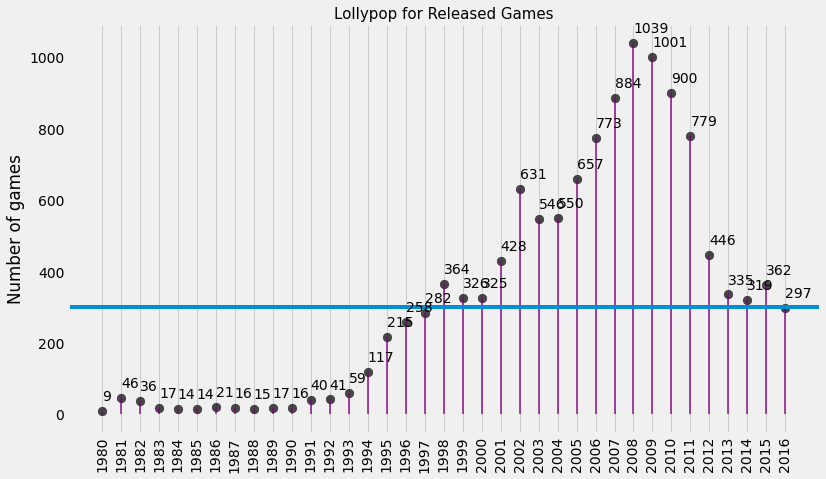

In [31]:
# Visualising number of games on each year


plt.style.use('fivethirtyeight')

fig,ax=plt.subplots(figsize=(12,7))
ax.grid(axis='y')
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.titles, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release,y=df.titles, s=75, color='black',alpha=0.7)

ax.set_title("Lollypop for Released Games", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release,rotation=90)
ax.axhline(y=300)

for row in df.itertuples():
    ax.text(row.year_of_release, row.titles+30,s=row.titles)
plt.show()

Here we can see our whole time period and the number of games released each year.

For our purpose of finding the relevant trends in gaming industry we should pay more attention to later years (2013-2016). Exploring earlier periods may prove to be useful for general marketing research. 

#### Look at how sales varied from platform to platform.
#### Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

It should help to see the overall sales distribution between top selling platforms.

In [32]:
# Creating dataframe with all platforms and their total sales

total_sales = data_clean[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
total_sales

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [33]:
# Adding a column with z-score

total_sales['sales_z']=(total_sales['total_sales']-total_sales['total_sales'].mean())/total_sales['total_sales'].std()
total_sales

,platform,total_sales,sales_z
0,PCFX,0.03,-0.825633
1,GG,0.04,-0.825604
2,3DO,0.10,-0.825431
3,TG16,0.16,-0.825257
4,WS,1.42,-0.821621
5,NG,1.44,-0.821563
6,SCD,1.86,-0.820351
7,DC,15.95,-0.779688
8,GEN,28.35,-0.743902
9,SAT,33.59,-0.728780


In [34]:
# Adding coloring

total_sales['color']=['red' if x<0 else 'green' for x in total_sales['sales_z']]
total_sales

,platform,total_sales,sales_z,color
0,PCFX,0.03,-0.825633,red
1,GG,0.04,-0.825604,red
2,3DO,0.10,-0.825431,red
3,TG16,0.16,-0.825257,red
4,WS,1.42,-0.821621,red
5,NG,1.44,-0.821563,red
6,SCD,1.86,-0.820351,red
7,DC,15.95,-0.779688,red
8,GEN,28.35,-0.743902,red
9,SAT,33.59,-0.728780,red


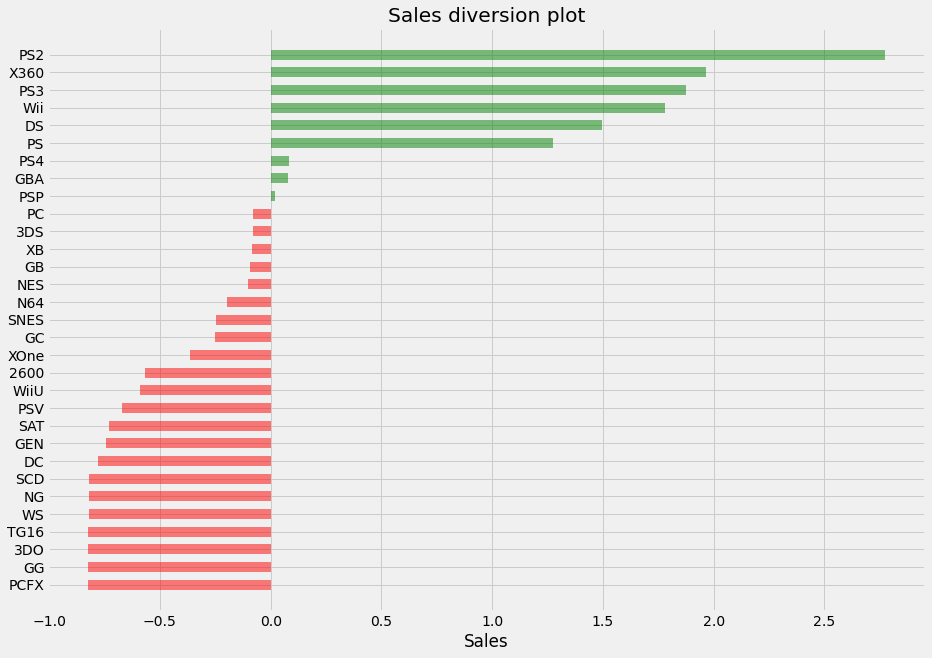

In [35]:
# Plotting a diversion plot

plt.figure(figsize=(14,10))
plt.hlines(y=total_sales.platform,xmax=total_sales.sales_z, xmin=0,color=total_sales.color, alpha=0.5, linewidth=10)
plt.title('Sales diversion plot')
plt.xlabel('Sales')
plt.show()

On the graph above we can see the distribution of sales in platforms. PS2, X360, PS3 are the absolute leaders based on total period of time. Let's investigate more recent data.

#### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [36]:
relevant_data = data_clean[data_clean.year_of_release >= 2006]
platform_age = relevant_data.groupby(['platform'])['year_of_release'].agg(['min','max'])
platform_age.head(20)

,min,max
platform,,
3DS,2010,2016
DC,2007,2008
DS,2006,2013
GBA,2006,2007
GC,2006,2007
PC,2006,2016
PS2,2006,2011
PS3,2006,2016
PS4,2013,2016


In [37]:
platform_age['age'] = platform_age['max']-platform_age['min']
platform_age

,min,max,age
platform,,,
3DS,2010,2016,6
DC,2007,2008,1
DS,2006,2013,7
GBA,2006,2007,1
GC,2006,2007,1
PC,2006,2016,10
PS2,2006,2011,5
PS3,2006,2016,10
PS4,2013,2016,3


In [38]:
platform_age = platform_age.reset_index()
platform_age.sort_values(by='min')
platform_age

,platform,min,max,age
0,3DS,2010,2016,6
1,DC,2007,2008,1
2,DS,2006,2013,7
3,GBA,2006,2007,1
4,GC,2006,2007,1
5,PC,2006,2016,10
6,PS2,2006,2011,5
7,PS3,2006,2016,10
8,PS4,2013,2016,3
9,PSP,2006,2015,9


It would help us is we could find platforms that used to be popular but now have zero sales. And how long does it generally take for new platforms to appear and old ones to fade?

Let's plot a line graph with all platforms with their over years sales.

In [39]:
# Saving grouped data for plotting

new_df = data_clean.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release').tail(35)
new_df

,platform,year_of_release,total_sales
38,DS,2013,1.54
209,Wii,2013,8.59
154,PS3,2013,113.25
171,PSP,2013,3.38
214,WiiU,2013,21.65
226,X360,2013,88.58
177,PSV,2014,11.90
172,PSP,2014,0.24
227,X360,2014,34.74
18,3DS,2014,43.76


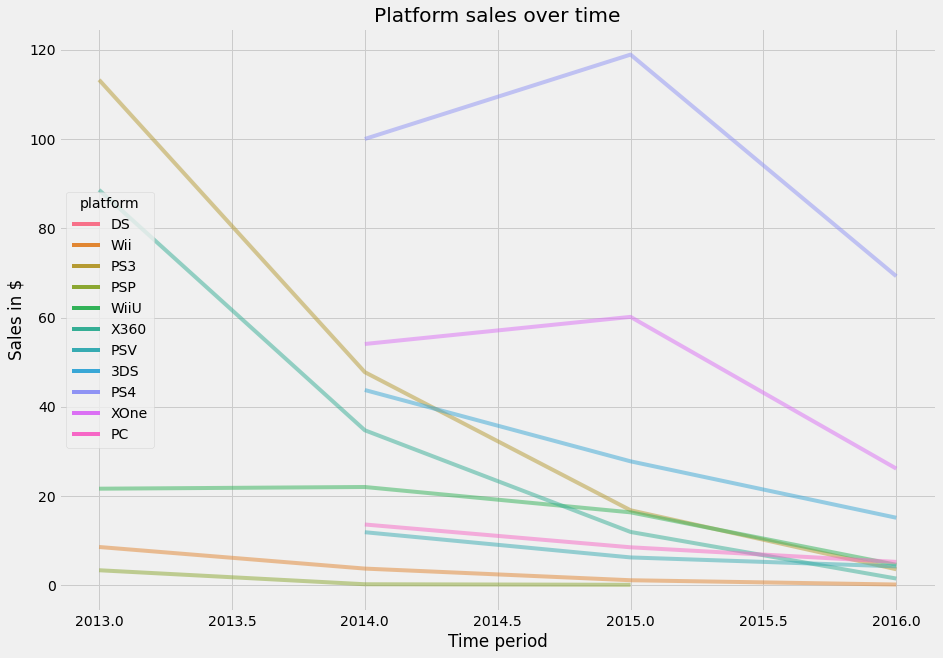

In [40]:
# Plotting a line graph

plt.figure(figsize=(14,10))
ax = sns.lineplot(data=new_df, x="year_of_release", y="total_sales",hue="platform", alpha=0.5)
plt.title('Platform sales over time')
plt.xlabel('Time period')
plt.ylabel('Sales in $')
plt.show()

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017.

Judging by the graph we've build above, I think we should only keep the data about games released from 2013, mainly because the videogame market saw major changes with the release of PS4 and Xbox One. And because our end-goal with this project is to understand trends and tendancies within videogame industry.

In [41]:
# Resaving filtered data

data_new = data_clean[data_clean.year_of_release >= 2013]
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [42]:
# Creating a pivot table with new data

pivot_data = pd.pivot_table(data_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
pivot_data.tail()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


#### Which ones are growing or shrinking? Select several potentially profitable platforms.

By looking at the table with numbers above we can see the total sales dynamics for several platforms.

Let's go further and build a heatmap plot to see the whole picture with more clarity.

In [43]:
# Transposing our pivot table

dynamics = (pivot_data-pivot_data.shift(+1)).T
dynamics

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,NaN,-12.81,-15.98,-12.64
DS,NaN,-1.54,0.00,0.00
PC,NaN,0.97,-5.11,-3.27
PS3,NaN,-65.49,-30.94,-13.22
PS4,NaN,74.01,18.90,-49.65
PSP,NaN,-3.14,-0.12,-0.12
PSV,NaN,1.31,-5.65,-2.00
Wii,NaN,-4.84,-2.61,-0.96
WiiU,NaN,0.38,-5.68,-11.75


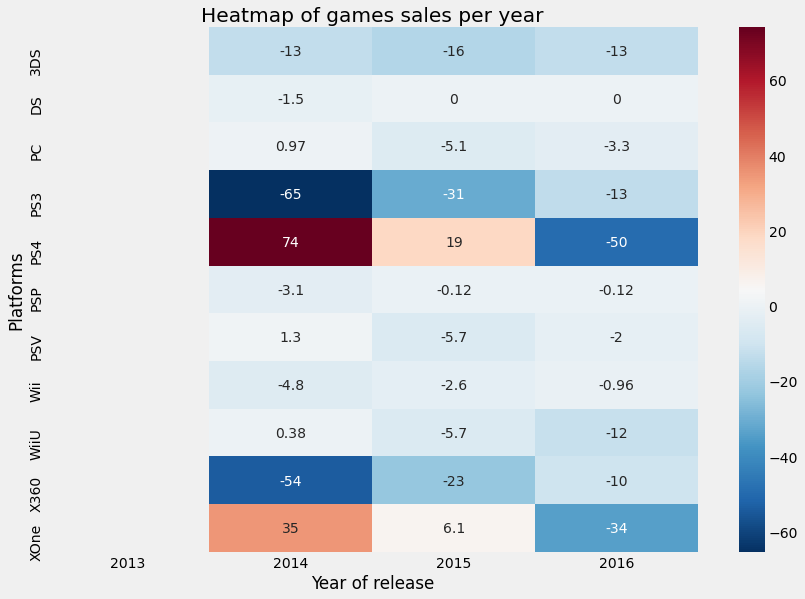

In [44]:
# Plotting a heatmap for sales on platforms

plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r', annot=True)
plt.title('Heatmap of games sales per year')
plt.xlabel('Year of release')
plt.ylabel('Platforms')
plt.show()

With this visual representation we can say that all our platforms do not have positive sales dynamics. It is worth noting the year 2014 for PS4, PS3, X360 and XOne. PS4 along with Xbox One are in positive game sales only because they were released that year and PS3 with Xbox 360 went down in sales as it goes with generational changes. But there is a twist.

Platforms which can be considered promising are:
 - PC
 - PS3
 - PSVita
 - Wii
 - Xbox 360
 
Curious how there seems to be no sign of PS4 and Xbox One. But that's the conclusion that we got from the heatmap.

In [45]:
# Reviewer's code 3

data_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


### Build a box plot for the global sales of each game, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Our next task is to build a boxplot for the global sales of each game, broken down by platform.

Let's start off by grouping data by platform, name and sales.

In [46]:
# Creating grouped data 

grouped = data_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
grouped

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
2232,XOne,XCOM 2,0.04
2233,XOne,ZombiU,0.01
2234,XOne,Zombie Army Trilogy,0.11
2235,XOne,Zoo Tycoon (2013),0.36


In [47]:
# Creating an ordered list of platforms by their sales

order = grouped.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order

1       DS
5      PSP
7      Wii
6      PSV
2       PC
8     WiiU
9     X360
0      3DS
10    XOne
3      PS3
4      PS4
Name: platform, dtype: object

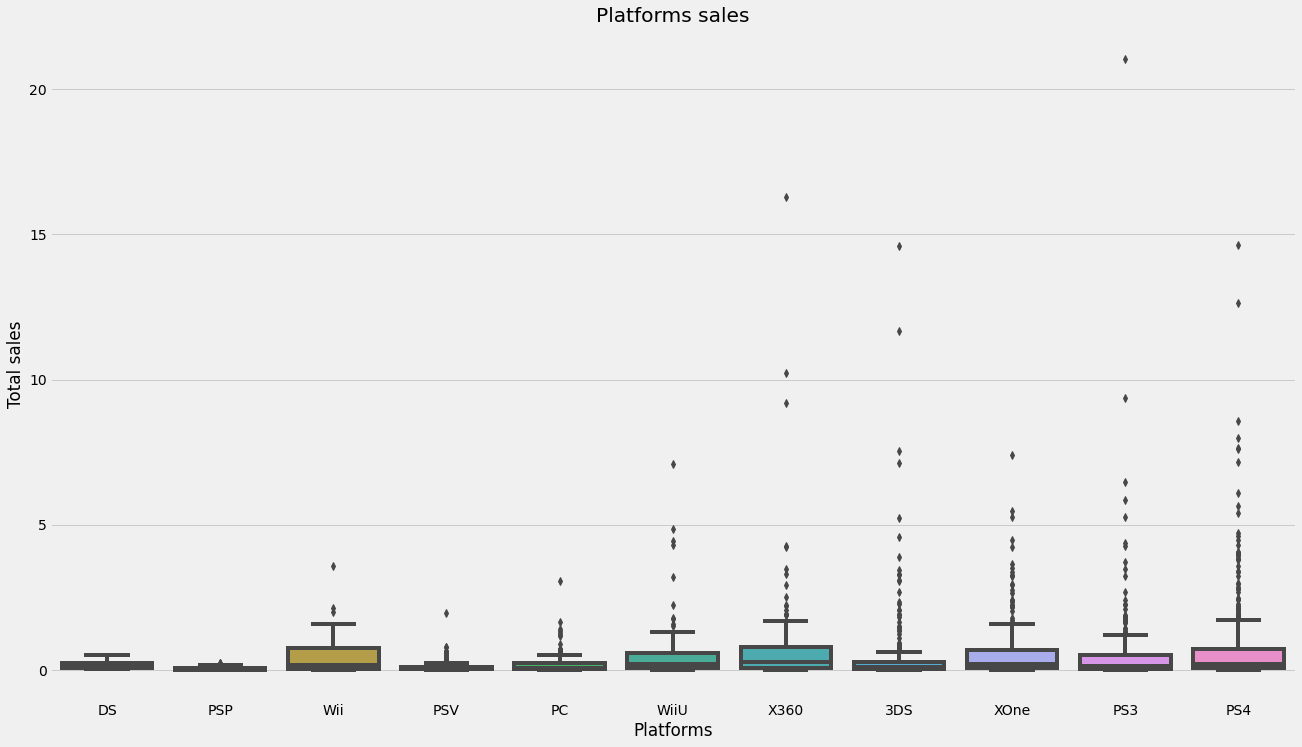

In [48]:
# Plotting a boxplot for platform sales

sns.catplot(x='platform',y='total_sales',data=grouped, kind='box', aspect=1.8, height=10, order=order)
plt.title('Platforms sales')
plt.xlabel('Platforms')
plt.ylabel('Total sales')
plt.show()

If we take a look at the outliers we can see individual games that sold really well on some platforms.

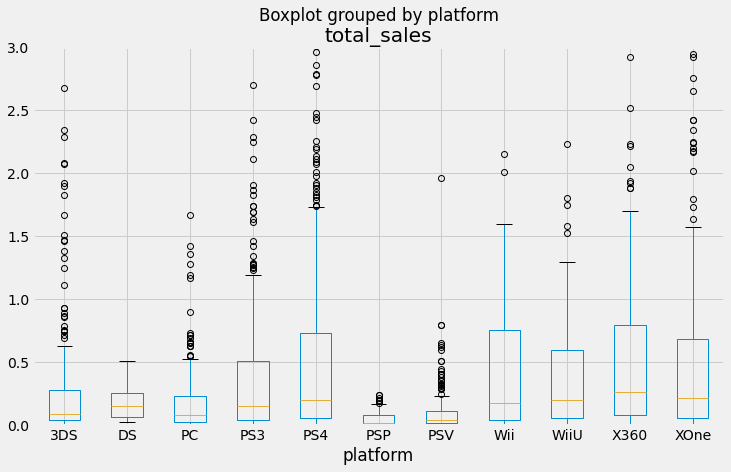

In [49]:
# Reviewer's code 3


data_new.boxplot('total_sales', by='platform', figsize=(12,7))
plt.ylim(0,3);

#### Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- build a function and iterate over it 

The differences in sales are significant but not all platforms though. The average sales differences between top 3 platforms and the rest can be observed easily.

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [50]:
data_new.genre.value_counts().sort_values(ascending=False)

Action          769
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            156
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

If we look at the genre distribution of games we can confirm that most popular genre by far is "Action". Which makes sense - action games speak for themselves and capture a broad audience. It's also lowest commitment type of gaming, other genres may require the user to have attention to detail or some other form of engagement.

But if we look at median sales per genre we can notice that Shooter genre sells a lot more that Action.

In [51]:
data_new.groupby(by='genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Misc            0.105
Simulation      0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

In [52]:
# Creating a function

def score_effect(data, platform, score_type):
    
    platform_data = data[data['platform'] == platform]
    
    correlation = platform_data[score_type].corr(platform_data['total_sales'])
    
    if correlation > 0.7:
        result = f'Correlation: {correlation:.2f} (positive correlation between {score_type} and total sales)'
    else:
        result = f'Correlation: {correlation:.2f} (not enough correlation between {score_type} and total sales)'
        
    plt.figure(figsize=(12, 9))
    plt.scatter(platform_data[score_type], platform_data['total_sales'])
    
    # Updated titles without underscore character
    plt.title(f'{platform} - {score_type.replace("_", " ").capitalize()} vs Total Sales')
    plt.xlabel(f'{score_type.replace("_", " ").capitalize()} rating')
    plt.ylabel('Total Sales')
    
    plt.show()
    
    return result

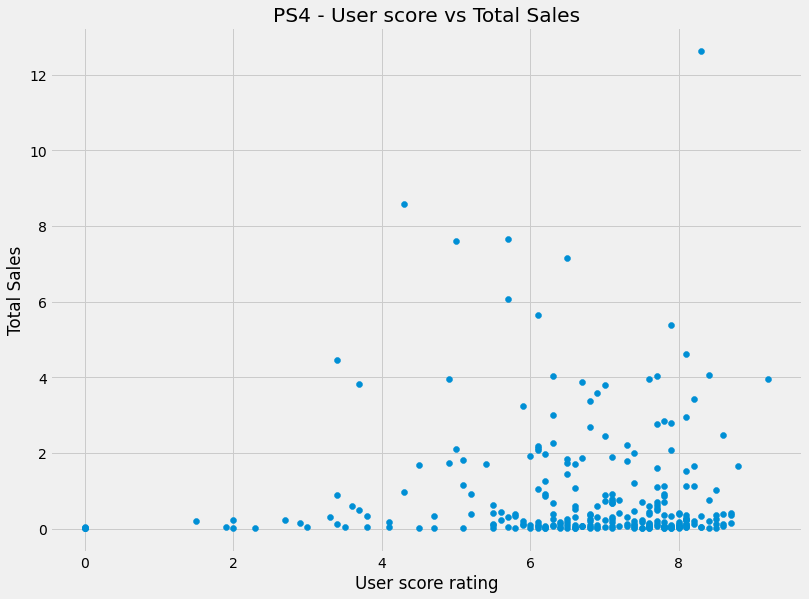

'Correlation: 0.02 (not enough correlation between user_score and total sales)'

In [53]:
# Testing the function

score_effect(data_clean, 'PS4', 'user_score')

Platform: PS4, Score Type: user_score


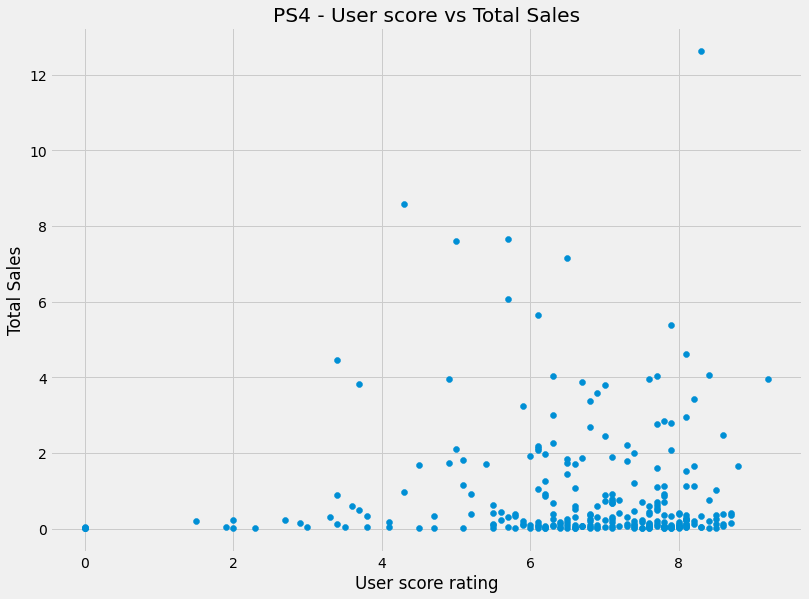

Platform: PS4, Score Type: critic_score


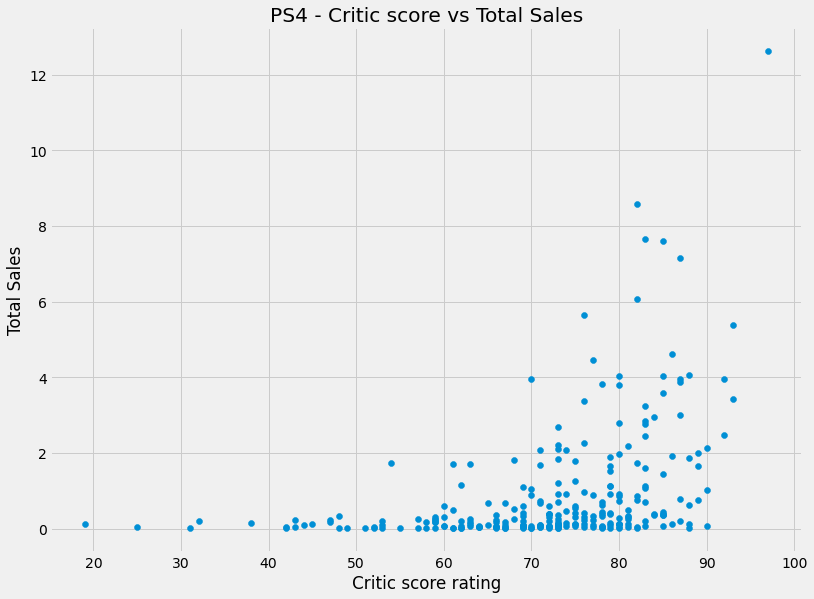

Platform: PS3, Score Type: user_score


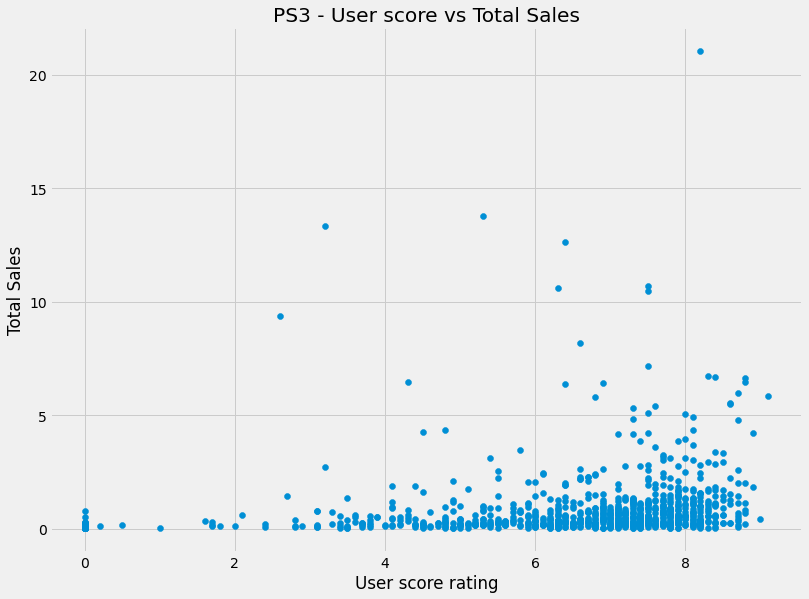

Platform: PS3, Score Type: critic_score


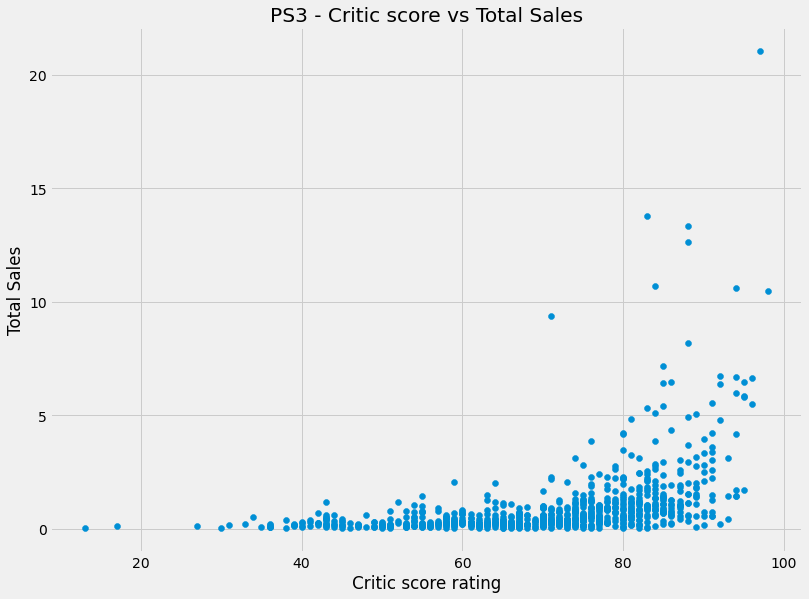

Platform: X360, Score Type: user_score


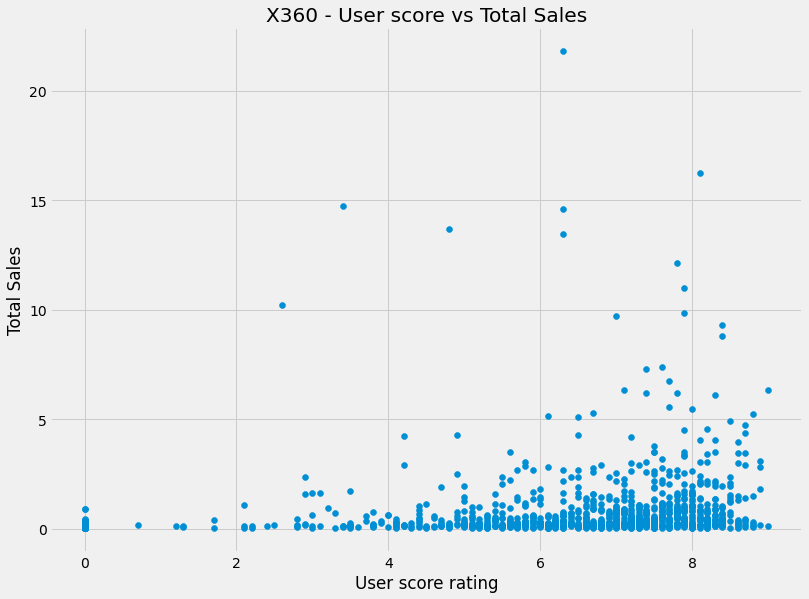

Platform: X360, Score Type: critic_score


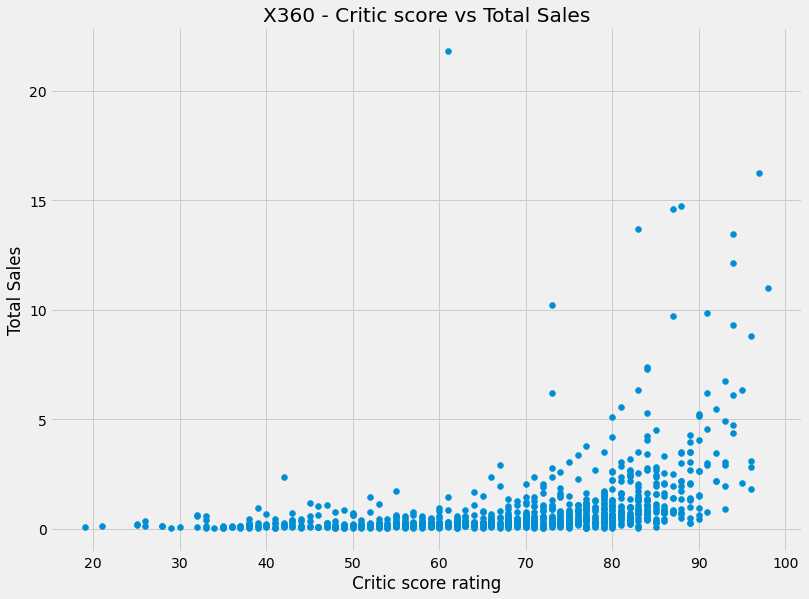

In [54]:
# Performing iteration

plat = ['PS4', 'PS3', 'X360']
col = ['user_score', 'critic_score']

future_df = []

for i in plat:
    for x in col:
        print(f'Platform: {i}, Score Type: {x}')
        result = str(score_effect(data_clean, i, x))
        future_df.append([i, x, result])

Overall we have low positive correlation and sometimes no correlation at all. Most graph also contain a lot of ouliers.

### Step 4. Create a user profile for each region

 - For each region (NA, EU, JP), we'll determine:
1. The top five platforms. Describe variations in their market shares from region to region.
2. The top five genres. Explain the difference.
3. Do ESRB ratings affect sales in individual regions?

In [55]:
# Grouping for NA platforms

na = data_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


In [56]:
# Grouping for NA genres

na_genres = data_new.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_genres

,genre,na_sales
0,Action,126.13
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [57]:
na.value_counts()

platform  na_sales
3DS       38.20       1
PS3       63.50       1
PS4       108.74      1
X360      81.66       1
XOne      93.12       1
dtype: int64

In [58]:
na_genres.value_counts()

genre         na_sales
Action        126.13      1
Misc          27.49       1
Role-Playing  46.40       1
Shooter       109.74      1
Sports        65.27       1
dtype: int64

North American gamers prefer Xbox 360 the most and their most loved genres are Action, Shooter and Sports. PS and 3DS consoles are also recognized. 

In [59]:
# Grouping for JP platforms

jp = data_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


In [60]:
# Grouping for JP genres

jp_genres = data_new.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_genres

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.44
2,Fighting,7.65
8,Shooter,6.61


In [61]:
jp.value_counts()

platform  jp_sales
3DS       67.81       1
PS3       23.35       1
PS4       15.96       1
PSV       18.59       1
WiiU      10.88       1
dtype: int64

In [62]:
jp_genres.value_counts()

genre         jp_sales
Action        40.49       1
Fighting      7.65        1
Misc          9.44        1
Role-Playing  51.04       1
Shooter       6.61        1
dtype: int64

Japaneese gamers have different tastes for consoles, their most sold console is 3DS followed by PS3, PS5 and PS4. Role-Playing games, Action games and Fighting games are in top 5 genres for Japan.

In [63]:
# Grouping for EU platforms

eu = data_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


In [64]:
# Grouping for EU genres

eu_genres = data_new.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_genres

,genre,eu_sales
0,Action,118.61
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [65]:
eu.value_counts(normalize=True)

platform  eu_sales
3DS       30.96       0.2
PS3       67.81       0.2
PS4       141.09      0.2
X360      42.52       0.2
XOne      51.59       0.2
dtype: float64

In [66]:
eu_genres.value_counts(normalize=True)

genre         eu_sales
Action        118.61      0.2
Racing        20.19       0.2
Role-Playing  36.97       0.2
Shooter       87.86       0.2
Sports        60.52       0.2
dtype: float64

European gamers have similar tastes in genres to NA audience but the hardware rating is different. PS4 and PS3 are leading platforms for gaming in Europe. Top genres include Action, Shooter, Sports, Role-PLaying and Racing games.

We can also create a dataframe with sales for all platforms to show everything together with something else.

In [67]:
# Grouping data for all sales

all_rev = data_new.groupby(['platform'])['na_sales','jp_sales','eu_sales'].sum().reset_index()
all_rev

,platform,na_sales,jp_sales,eu_sales
0,3DS,38.20,67.81,30.96
1,DS,0.57,0.00,0.85
2,PC,11.19,0.00,25.84
3,PS3,63.50,23.35,67.81
4,PS4,108.74,15.96,141.09
5,PSP,0.00,3.53,0.17
6,PSV,5.04,18.59,6.10
7,Wii,6.56,0.05,5.93
8,WiiU,29.21,10.88,19.85
9,X360,81.66,0.51,42.52


In [68]:
# Creating additional columns with percentile

all_rev['na_sales%'] = all_rev['na_sales'] / all_rev['na_sales'].sum()
all_rev['jp_sales%'] = all_rev['jp_sales'] / all_rev['jp_sales'].sum()
all_rev['eu_sales%'] = all_rev['eu_sales'] / all_rev['eu_sales'].sum()

In [69]:
all_rev.sort_values(by='na_sales',ascending=False)

,platform,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
4,PS4,108.74,15.96,141.09,0.248384,0.113175,0.359273
10,XOne,93.12,0.34,51.59,0.212705,0.002411,0.131369
9,X360,81.66,0.51,42.52,0.186528,0.003617,0.108273
3,PS3,63.50,23.35,67.81,0.145047,0.165579,0.172672
0,3DS,38.20,67.81,30.96,0.087256,0.480854,0.078837
8,WiiU,29.21,10.88,19.85,0.066721,0.077152,0.050546
2,PC,11.19,0.00,25.84,0.025560,0.000000,0.065799
7,Wii,6.56,0.05,5.93,0.014984,0.000355,0.015100
6,PSV,5.04,18.59,6.10,0.011512,0.131825,0.015533
1,DS,0.57,0.00,0.85,0.001302,0.000000,0.002164


In [70]:
all_rev.sort_values(by='jp_sales',ascending=False)

,platform,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
0,3DS,38.20,67.81,30.96,0.087256,0.480854,0.078837
3,PS3,63.50,23.35,67.81,0.145047,0.165579,0.172672
6,PSV,5.04,18.59,6.10,0.011512,0.131825,0.015533
4,PS4,108.74,15.96,141.09,0.248384,0.113175,0.359273
8,WiiU,29.21,10.88,19.85,0.066721,0.077152,0.050546
5,PSP,0.00,3.53,0.17,0.000000,0.025032,0.000433
9,X360,81.66,0.51,42.52,0.186528,0.003617,0.108273
10,XOne,93.12,0.34,51.59,0.212705,0.002411,0.131369
7,Wii,6.56,0.05,5.93,0.014984,0.000355,0.015100
1,DS,0.57,0.00,0.85,0.001302,0.000000,0.002164


In [71]:
all_rev.sort_values(by='eu_sales',ascending=False)

,platform,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
4,PS4,108.74,15.96,141.09,0.248384,0.113175,0.359273
3,PS3,63.50,23.35,67.81,0.145047,0.165579,0.172672
10,XOne,93.12,0.34,51.59,0.212705,0.002411,0.131369
9,X360,81.66,0.51,42.52,0.186528,0.003617,0.108273
0,3DS,38.20,67.81,30.96,0.087256,0.480854,0.078837
2,PC,11.19,0.00,25.84,0.025560,0.000000,0.065799
8,WiiU,29.21,10.88,19.85,0.066721,0.077152,0.050546
6,PSV,5.04,18.59,6.10,0.011512,0.131825,0.015533
7,Wii,6.56,0.05,5.93,0.014984,0.000355,0.015100
1,DS,0.57,0.00,0.85,0.001302,0.000000,0.002164


Now that we have a general idea about which game platforms sell the most games in three regions, now we can take a look at how ESRB rating affects sales. 

In [72]:
# Creating a table with regional sales of games with each rating

all_rat = data_new.groupby(['rating'])['na_sales','jp_sales','eu_sales'].sum().reset_index()
all_rat

,rating,na_sales,jp_sales,eu_sales
0,E,79.05,15.14,83.36
1,E10+,54.24,5.89,42.69
2,M,165.29,14.11,145.80
3,T,49.79,20.59,41.95


In [73]:
# Adding percentile columns

all_rat['na_sales%'] = all_rat['na_sales'] / all_rat['na_sales'].sum()
all_rat['jp_sales%'] = all_rat['jp_sales'] / all_rat['jp_sales'].sum()
all_rat['eu_sales%'] = all_rat['eu_sales'] / all_rat['eu_sales'].sum()

In [74]:
all_rat.sort_values(by='na_sales',ascending=False)

,rating,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
2,M,165.29,14.11,145.80,0.474467,0.253185,0.464627
0,E,79.05,15.14,83.36,0.226914,0.271667,0.265647
1,E10+,54.24,5.89,42.69,0.155697,0.105688,0.136042
3,T,49.79,20.59,41.95,0.142923,0.369460,0.133684


In [75]:
all_rat.sort_values(by='jp_sales',ascending=False)

,rating,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
3,T,49.79,20.59,41.95,0.142923,0.369460,0.133684
0,E,79.05,15.14,83.36,0.226914,0.271667,0.265647
2,M,165.29,14.11,145.80,0.474467,0.253185,0.464627
1,E10+,54.24,5.89,42.69,0.155697,0.105688,0.136042


In [76]:
all_rat.sort_values(by='eu_sales',ascending=False)

,rating,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
2,M,165.29,14.11,145.80,0.474467,0.253185,0.464627
0,E,79.05,15.14,83.36,0.226914,0.271667,0.265647
1,E10+,54.24,5.89,42.69,0.155697,0.105688,0.136042
3,T,49.79,20.59,41.95,0.142923,0.369460,0.133684


In [77]:
# Grouping NA sales mean value by ratings

na_rating_mean = data_new.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False).head()
na_rating_mean

,rating,na_sales
2,M,0.444328
0,E,0.261755
1,E10+,0.215238
3,T,0.149520


In [78]:
# Grouping NA sales total sum by ratings

na_rating_sum = data_new.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_rating_sum

,rating,na_sales
2,M,165.29
0,E,79.05
1,E10+,54.24
3,T,49.79


In [79]:
# Grouping JP sales mean value by ratings

jp_rating_mean = data_new.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_rating_mean

,rating,jp_sales
3,T,0.061832
0,E,0.050132
2,M,0.037930
1,E10+,0.023373


In [80]:
# Grouping JP sales total sum by ratings

jp_rating_sum = data_new.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_rating_sum

,rating,jp_sales
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


In [81]:
# Grouping EU sales mean value by ratings

eu_rating_mean = data_new.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_rating_mean

,rating,eu_sales
2,M,0.391935
0,E,0.276026
1,E10+,0.169405
3,T,0.125976


In [82]:
# Grouping EU sales total sum by ratings

eu_rating_sum = data_new.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_rating_sum

,rating,eu_sales
2,M,145.80
0,E,83.36
1,E10+,42.69
3,T,41.95


We can conclude that in NA and Europe games with Mature rating sell the most, but in Japan a Teen rating for games are more popular than others.

**Total profile for NA:**

*Top platforms* are PS4, Xbox One, Xbox 360, PS3, 3DS.

*Top genres* are Action, shooter, sports, rpg, misc.

*Top ratings* are M, E, E10+, T.

**Total profile for EU:**

*Top platforms* are PS4, PS3, Xbox One, Xbox 360, 3DS.

*Top genres* are Action, shooter, sports, rpg, racing.

*Top ratings* are M, E, E10+, T.

**Total profile for JP:**

*Top platforms* are 3DS, PS3, Vita, PS4, WiiU.

*Top genres* are Rpg, action, misc, fighting, shooter.

*Top ratings* are T, E, M, E10+.

### Step 5. Test the following hypotheses:

 - Average user ratings of the Xbox One and PC platforms are the same;
 - Average user ratings for the Action and Sports genres are different;

The alpha threshold value will be 0,5.
 
**I'll explain:**
1. How I formulated the null and alternative hypotheses
2. What significance level I chose to test the hypotheses, and why

In [83]:
def t_test(sample1,sample2,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 

Our first **null hypothesis** is that average the user ratings of the Xbox One and PC platforms are the same. Thus our **alternative hypothesis** is that they are different.

Let's create the lists for our 2 test subjects and store them as floats. 

In [84]:
# Creating ratings list for Xbox One

xbox = data_new[(data_new.platform == 'XOne') & (data_new.user_score.notna()) & (data_new.user_score != 'tbd')]['user_score'].astype(float)
xbox

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16597    6.0
16630    8.2
16643    6.6
16660    6.7
16672    0.0
Name: user_score, Length: 193, dtype: float64

In [85]:
# Showing unique ratings for Xbox

xbox.unique()

array([7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 4.3, 3.1, 6.1, 8.2,
       7.4, 5.9, 6.9, 6.6, 6.3, 6.8, 5.8, 7.3, 8. , 9.2, 7.8, 8.4, 5.1,
       5.2, 7.7, 5.6, 5.7, 7. , 6.7, 4.6, 8.1, 6. , 7.1, 3.2, 8.6, 8.5,
       5.3, 4. , 8.3, 3. , 8.7, 0. , 2.1, 7.6, 4.9, 8.9, 1.6, 4.2, 8.8])

In [86]:
# Creating ratings list for PC

pc = data_new[(data_new.platform == 'PC') & (data_new.user_score.notna()) & (data_new.user_score != 'tbd')]['user_score'].astype(float)
pc

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 163, dtype: float64

In [87]:
# Showing unique ratings for PC

pc.unique()

array([3.9, 7.9, 2.2, 6. , 5.4, 5.7, 5.9, 4.2, 9.3, 8.5, 8. , 7.7, 5.5,
       6.7, 6.5, 6.2, 3. , 6.8, 8.3, 8.2, 4.7, 5.8, 4.5, 4.6, 7.6, 6.9,
       2.1, 7.5, 3.3, 7.3, 7.1, 4.4, 3.2, 8.6, 4.3, 7.4, 3.5, 8.1, 4.8,
       6.4, 8.4, 5.3, 8.9, 3.8, 2.5, 7. , 2.9, 3.6, 5.1, 3.4, 4. , 0. ,
       6.1, 6.3, 8.7, 7.8, 1.4, 3.7, 2.4])

In [88]:
# P-value for user ratings on XOne vs PC platforms and if it's lower than alpha value

print(stats.ttest_ind(xbox, pc).pvalue)
print(stats.ttest_ind(xbox, pc).pvalue<0.05)

0.7735037279893525
False


In [89]:
t_test(xbox,pc)

Fail to Reject H0: We don't have enough evidence to say that averages of sample 1   and sample 2 are not the same


We **failed to reject the *first* null hypothesis** this means that we supported the null hypothesis in that the average user ratings of the Xbox One and PC platforms are the same.

Our second **null hypothesis** is that the average user ratings for the Sports and Action genres are equal, and our **alternative hypothesis** is that they are the different. 

We'll also create 2 lists to test this as float data types.

In [90]:
# Creating ratings list for Action genre

action = data_new[(data_new.genre == 'Action') & (data_new.user_score.notna()) & (data_new.user_score != 'tbd')]['user_score'].astype(float)
action

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16652    8.5
16654    5.1
16660    6.7
16672    0.0
16692    7.6
Name: user_score, Length: 435, dtype: float64

In [91]:
# Showing unique ratings for Action genre

action.unique()

array([8.2, 8.1, 8.3, 9.1, 7.9, 8.4, 6.3, 4.9, 7.6, 4.1, 6.8, 8.9, 7.8,
       8.6, 9. , 7.7, 7.5, 7.4, 6.5, 5.1, 7.3, 4.5, 4.2, 5.8, 6.6, 6.1,
       8. , 7.2, 6.2, 5. , 6.4, 5.9, 0. , 8.7, 7.1, 7. , 5.2, 5.3, 6.7,
       5.4, 4.6, 8.5, 3.4, 3. , 6.9, 3.7, 5.6, 4.7, 4.8, 5.7, 3.6, 3.3,
       4.3, 5.5, 6. , 3.2, 8.8, 2.5, 4.4, 3.5, 3.8, 2.4, 2. , 2.8, 3.1,
       2.3])

In [92]:
# Creating ratings list for Sports genre

sports = data_new[(data_new.genre == 'Sports') & (data_new.user_score.notna()) & (data_new.user_score != 'tbd')]['user_score'].astype(float)
sports

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16146    6.9
16450    4.5
16518    1.4
16638    0.0
16643    6.6
Name: user_score, Length: 173, dtype: float64

In [93]:
# # Showing unique ratings for Sports genre

sports.unique()

array([4.3, 5. , 5.7, 4.5, 4.2, 6.7, 4.4, 5.9, 6.3, 3.2, 5.5, 4.9, 7. ,
       6.1, 6.2, 5.6, 5.4, 4.1, 3. , 2.9, 6.4, 2.7, 6.5, 3.5, 7.4, 5.8,
       5.1, 7.5, 7.7, 7.8, 5.2, 7.1, 3.1, 7.2, 4.6, 3.3, 4. , 6.9, 3.6,
       6. , 8.2, 2.4, 2.8, 7.6, 5.3, 6.8, 1.8, 1.7, 3.8, 8.7, 1.6, 6.6,
       8.3, 1.5, 3.4, 0.7, 7.3, 2. , 2.1, 0.2, 0. , 1.9, 4.8, 8. , 3.9,
       3.7, 8.8, 1.4])

In [94]:
# P-value for user ratings on Action vs Sports genres and if it's lower than alpha value

print(stats.ttest_ind(action, sports).pvalue)
print(stats.ttest_ind(action, sports).pvalue<0.05)

8.045056818909517e-10
True


In [95]:
t_test(action, sports)

Reject H0: average of sample 1 is not equal to average of sample 2


We have **rejected the *second* null hypotesis**, this means that average user ratings for Action and Sports genre games **are not equal** and we **supported the alternative hypothesis**.

### Step 6. Write a general conclusion

Let's go step by step on how we got to this point. Our dataframe had a table of video games sold by online store "Ice" which contained rows of sold games in different regions and on different platforms. We fixed column names first then filled missing dates of releases and dealt with object values in column "user_score" by replacing them with 0's. 

After fixing the data types and other mistakes with our data, we added "total_sales" column with combined sales for all regions from periods 1980-2016. From that dataframe we created separate dataframe using the groupby method to save only number of unique games released each year and visualized it.

Then we created another separate dataframe with total sales per platform and created a diversion plot with it after adding a "z-score" column to that dataframe to help us find the more growing in sales platforms. 

We also build a line graph with platform sales over all time period and a heatmap of released games per smaller, more relevant years on all platforms. To help us even further understand the distribution of public's interests in a given console we plotted a boxplot for console sales.

We defined a function that was used to iterate over the 3 top sold platforms with both score types. All the function does is calculate the correlation value between given platform and score type vs total sales and show each represented scatter plot.

After that we used groupby methods to determine top 5 sold platforms and genres for 3 regions: North America, Europe and Japan. which led us to formulation  of our null hypotheses: 
   - Average user ratings of the Xbox One and PC platforms are the same;
   - Average user ratings for the Action and Sports genres are different;
 
We failed to reject the ***first*** null hypothesis and could not support the ***second*** null hypothesis. 

To conclude our analysis let's break down each regions promising platforms, genres and preferred ratings:
 - North America:
     * PS4 and Xbox One;
     * Action and Shooter;
     * Mature and Teen ratings.
 - Europe:
     * PS4 and PS3;
     * Action and Shooter;
     * Mature and Everyone ratings.
 - Japan:
     * 3DS, PS3, PS4;
     * Role-playing and Action;
     * Teen and Everyone ratings.